In [1]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model

In [5]:
import tensorflow as tf 
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [6]:
from tensorflow.keras.utils import to_categorical
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 784)               2409232   
                                                                 
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 3,032,522
Trainable params: 3,032,522
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 18s 44ms/step - loss: 1.8215 - accuracy: 0.3471 - val_loss: 1.6703 - val_accuracy: 0.4021
Epoch 2/50
391/391 [==============================] - 17s 44ms/step - loss: 1.6235 - accuracy: 0.4243 - val_loss: 1.5566 - val_accuracy: 0.4489
Epoch 3/50
391/391 [==============================] - 18s 46ms/step - loss: 1.5405 - accuracy: 0.4529 - val_loss: 1.4680 - val_accuracy: 0.4794
Epoch 4/50
391/391 [==============================] - 17s 44ms/step - loss: 1.4780 - accuracy: 0.4741 - val_loss: 1.4883 - val_accuracy: 0.4665
Epoch 5/50
391/391 [==============================] - 17s 44ms/step - loss: 1.4343 - accuracy: 0.4900 - val_loss: 1.4403 - val_accuracy: 0.4954
Epoch 6/50
391/391 [==============================] - 17s 44ms/step - loss: 1.4000 - accuracy: 0.5026 - val_loss: 1.3905 - val_accuracy: 0.5080
Epoch 7/50
391/391 [==============================] - 17s 44ms/step - loss: 1.3497 - accuracy: 0.5203 - val_loss: 1.4217 - val_accuracy:

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.0220 - accuracy: 0.5475


[2.0220229625701904, 0.5475000143051147]

In [ ]:
img=load_img('xehoi.jfif',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)

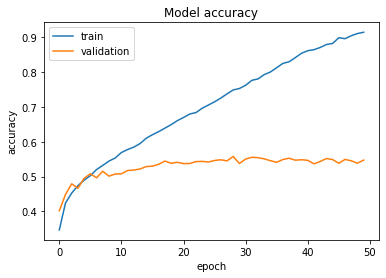

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")

In [ ]:
model.save('nhandien10vat.h5')